In [1]:
# Importing Libraries

In [2]:
import os
import sys
import numpy as np
import pandas as pd
import glob

In [3]:
# Importing Data

In [4]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
# Installing Time Series libraries 

In [6]:
pip install pyramid-arima

     |████████████████████████████████| 604kB 2.7MB/s 


In [7]:
pip install pmdarima

     |████████████████████████████████| 1.5MB 2.7MB/s 
     |████████████████████████████████| 2.1MB 12.5MB/s 
     |████████████████████████████████| 8.7MB 34.3MB/s 
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import seaborn as sns
import scipy
%matplotlib inline
import scipy
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import pyramid as pm
from sklearn import metrics

import pmdarima as pm
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/pyramid/__init__.py:68: UserWarning: 
    The 'pyramid' package will be migrating to a new namespace beginning in 
    version 1.0.0: 'pmdarima'. This is due to a package name collision 

In [9]:
# Loading Data

In [10]:
#df = pd.read_csv('content/drive/My Drive/REVA/Interview/inputData.csv")

df = pd.read_csv('/content/drive/My Drive/REVA/Interview/inputData.csv', sep=',')

In [11]:
# Exploratory Data Analysis

df.head()
df.tail()
df.shape
df.describe()


,Timestamp,Memory_Allocated,Memory_Used,CPU_Allocated,CPU_Used,Network_Bandwidth_Utilization,Storage_Space_Utilization,Group_ID,Instance
0,Feb-15-2019,30824,28382,5,2.57,0.0,530G,group_1_,011a0887-5900-40cc-9639-363b4e232a19
1,Feb-15-2019,30824,28381,5,3.24,0.0,530G,group_1_,011a0887-5900-40cc-9639-363b4e232a19
2,Feb-15-2019,30824,28424,5,2.69,0.0,530G,group_1_,011a0887-5900-40cc-9639-363b4e232a19
3,Feb-15-2019,30824,28520,5,3.26,0.0,530G,group_1_,011a0887-5900-40cc-9639-363b4e232a19
4,Feb-15-2019,30824,28331,5,2.72,0.0,530G,group_1_,011a0887-5900-40cc-9639-363b4e232a19


,Timestamp,Memory_Allocated,Memory_Used,CPU_Allocated,CPU_Used,Network_Bandwidth_Utilization,Storage_Space_Utilization,Group_ID,Instance
640879,Jun-23-2020,65536,65256,6,0.01,0.0,600G,group_1_,fec9074b-0908-409c-8b94-76f2e1cbf8db
640880,Jun-23-2020,65536,65256,6,0.01,0.0,600G,group_1_,fec9074b-0908-409c-8b94-76f2e1cbf8db
640881,Jun-23-2020,65536,65256,6,0.01,0.0,600G,group_1_,fec9074b-0908-409c-8b94-76f2e1cbf8db
640882,Jun-23-2020,65536,65256,6,0.01,0.0,600G,group_1_,fec9074b-0908-409c-8b94-76f2e1cbf8db
640883,Jun-23-2020,65536,65256,6,0.01,0.0,600G,group_1_,fec9074b-0908-409c-8b94-76f2e1cbf8db


(640884, 9)

,Memory_Allocated,Memory_Used,CPU_Allocated,CPU_Used,Network_Bandwidth_Utilization
count,6.408840e+05,640884.000000,640884.000000,640884.000000,640884.000000
mean,3.764882e+04,14156.427606,4.443264,0.228287,0.052127
std,1.161834e+05,28261.630666,5.537814,0.624546,2.070056
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,7.168000e+03,4774.000000,4.000000,0.020000,0.000000
75%,1.638400e+04,14724.000000,4.000000,0.190000,0.000000
max,1.048576e+06,389103.000000,32.000000,16.000000,832.020000


In [12]:
# Missing Values Check
df.info()
# Not found any missing values from below analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640884 entries, 0 to 640883
Data columns (total 9 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Timestamp                      640884 non-null  object 
 1   Memory_Allocated               640884 non-null  int64  
 2   Memory_Used                    640884 non-null  int64  
 3   CPU_Allocated                  640884 non-null  int64  
 4   CPU_Used                       640884 non-null  float64
 5   Network_Bandwidth_Utilization  640884 non-null  float64
 6   Storage_Space_Utilization      640884 non-null  object 
 7   Group_ID                       640884 non-null  object 
 8   Instance                       640884 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 44.0+ MB


In [13]:
df["Timestamp"]=pd.to_datetime(df['Timestamp']).dt.strftime('%Y-%m-%d')
pd.pivot_table(data=df, index='Timestamp', values='CPU_Used', aggfunc='mean').reset_index().rename(columns={'CPU_Used': 'average_number_of_CPU_Used'}).round(2)

,Timestamp,average_number_of_CPU_Used
0,2019-02-15,0.52
1,2019-02-16,0.49
2,2019-02-17,0.50
3,2019-02-18,0.52
4,2019-02-19,0.49
...,...,...
294,2020-06-19,0.59
295,2020-06-20,0.60
296,2020-06-21,0.61
297,2020-06-22,0.59


In [14]:
df_pivot=pd.pivot_table(data=df, index='Timestamp', values='CPU_Used', aggfunc='sum').reset_index().rename(columns={'CPU_Used': 'total_CPU_Used'})
df_pivot.head(12)

,Timestamp,total_CPU_Used
0,2019-02-15,387.68
1,2019-02-16,704.33
2,2019-02-17,704.99
3,2019-02-18,710.10
4,2019-02-19,704.89
5,2019-02-20,701.12
6,2019-02-21,703.78
7,2019-02-22,744.18
8,2019-02-23,564.41
9,2019-02-24,357.58


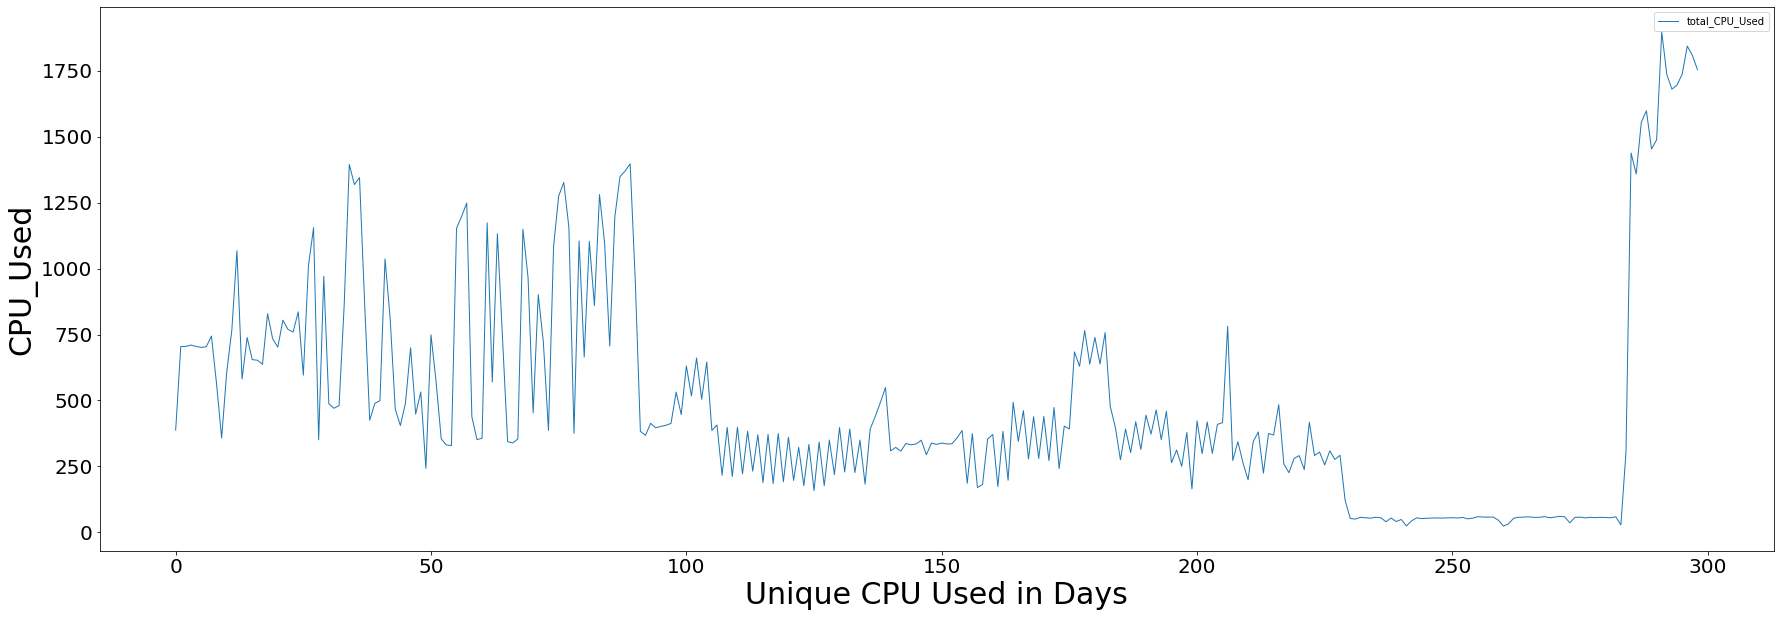

In [15]:

df_pivot.plot(figsize=(30,10), linewidth=1, fontsize=20)
plt.xlabel('Unique CPU Used in Days', fontsize=30);
plt.ylabel('CPU_Used', fontsize=30);

In [16]:
month = pd.date_range('20190831', periods = 11, freq = 'M')
month

DatetimeIndex(['2019-08-31', '2019-09-30', '2019-10-31', '2019-11-30',
               '2019-12-31', '2020-01-31', '2020-02-29', '2020-03-31',
               '2020-04-30', '2020-05-31', '2020-06-30'],
              dtype='datetime64[ns]', freq='M')

<Figure size 1080x720 with 0 Axes>

TypeError: ignored

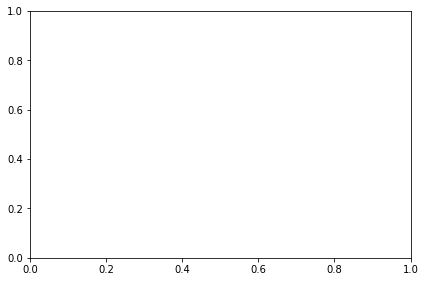

In [24]:
plt.figure(figsize=(15,10))
plt.subplot(221)
plt.plot(data,color="#00b8ff",label="Original")
plt.legend(loc="best")

plt.subplot(222)
plt.plot(trend,'b',label="Trend")
plt.legend(loc="best")

plt.subplot(223)
#plt.plot(data,color="#ff00ff",label="Original")
plt.plot(seasonal,'b',label="Seasonal")
plt.legend(loc="best")

plt.subplot(224)
plt.plot(residual,'y',label="residual")
plt.legend(loc="best")

plt.tight_layout()

plt.show()

In [23]:
data=df_pivot.loc[:,('Timestamp','CPU_Used')]
data.head()
data.describe()


KeyError: ignored